# INT104 CW2 Recommending different anaesthesia methods based on individual information

## Import data & Data cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import original data
Ori_data = pd.read_csv("Data.csv")

In [3]:
# data cleaning by removing those label 2
Filtered_data = Ori_data[Ori_data["Label"] != 2]
Filtered_data

,Patient index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Label
0,1,1,2,1,0,2,2,1,1,0,0,0,0,1,0,1,0
1,2,0,2,1,0,2,2,1,1,0,0,1,0,1,0,0,0
2,3,1,2,1,0,2,2,0,1,1,0,0,0,0,0,1,0
3,4,0,2,1,0,2,2,1,1,0,1,0,1,1,1,0,1
4,5,1,1,1,1,1,2,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,5340,1,2,1,0,1,1,0,1,1,1,1,0,1,1,1,0
5340,5341,1,2,1,0,2,2,0,1,0,0,1,0,0,0,0,0
5341,5342,1,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0
5342,5343,1,2,1,0,1,1,0,1,0,1,0,0,1,0,1,0


In [4]:
# check whether there is null in the df
Filtered_data.isnull().sum()

Patient index    0
F1               0
F2               0
F3               0
F4               0
F5               0
F6               0
F7               0
F8               0
F9               0
F10              0
F11              0
F12              0
F13              0
F14              0
F15              0
Label            0
dtype: int64

## Dimensionality reduction

### Zero-centered & standardization

In [5]:
Feature = Filtered_data.iloc[:,1:16]
Label = Filtered_data[["Label"]]

In [11]:
# print(Label)

      Label
0         0
1         0
2         0
3         1
4         1
...     ...
5339      0
5340      0
5341      0
5342      0
5343      0

[5330 rows x 1 columns]


In [6]:
def standard_z_score(series):
    std = series.std()
    mean = series.mean()
    return (series-mean)/std
Standardized_Data = standard_z_score(Feature)

In [7]:
# Standardized_Data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,1.495248,0.639939,0.57253,-0.673070,1.349540,0.685161,0.797404,0.671599,-0.681026,-0.885243,-0.777084,-0.538693,0.946192,-0.990570,1.218905
1,-0.668660,0.639939,0.57253,-0.673070,1.349540,0.685161,0.797404,0.671599,-0.681026,-0.885243,1.286621,-0.538693,0.946192,-0.990570,-0.820255
2,1.495248,0.639939,0.57253,-0.673070,1.349540,0.685161,-1.253834,0.671599,1.468097,-0.885243,-0.777084,-0.538693,-1.056669,-0.990570,1.218905
3,-0.668660,0.639939,0.57253,-0.673070,1.349540,0.685161,0.797404,0.671599,-0.681026,1.129422,-0.777084,1.855997,0.946192,1.009331,-0.820255
4,1.495248,-1.354724,0.57253,1.485451,-0.740854,0.685161,0.797404,0.671599,-0.681026,-0.885243,-0.777084,-0.538693,-1.056669,1.009331,-0.820255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,1.495248,0.639939,0.57253,-0.673070,-0.740854,-1.459237,-1.253834,0.671599,1.468097,1.129422,1.286621,-0.538693,0.946192,1.009331,1.218905
5340,1.495248,0.639939,0.57253,-0.673070,1.349540,0.685161,-1.253834,0.671599,-0.681026,-0.885243,1.286621,-0.538693,-1.056669,-0.990570,-0.820255
5341,1.495248,0.639939,0.57253,-0.673070,-0.740854,-1.459237,0.797404,-1.488704,-0.681026,-0.885243,-0.777084,-0.538693,-1.056669,-0.990570,-0.820255
5342,1.495248,0.639939,0.57253,-0.673070,-0.740854,-1.459237,-1.253834,0.671599,-0.681026,1.129422,-0.777084,-0.538693,0.946192,-0.990570,1.218905


### PCA for Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
newData=pca.fit_transform(Standardized_Data)
explained_variance_ratio_ = pca.explained_variance_ratio_
explained_variance_ = pca.explained_variance_
print(explained_variance_ratio_)
print(explained_variance_)

[0.19994982 0.12068936 0.08394209 0.07353539 0.06654941 0.06261736
 0.05869967 0.05663059 0.05279779 0.05075738 0.04691827 0.04160648
 0.03823421 0.02688796 0.02018423]
[2.99924728 1.81034034 1.25913133 1.10303084 0.99824114 0.93926041
 0.88049506 0.84945884 0.7919669  0.76136064 0.70377409 0.62409713
 0.57351309 0.40331939 0.30276352]


In [9]:
# the cumulative sum of the explained variance ratio
import matplotlib.pyplot as plt
cumulative_sum = np.cumsum(explained_variance_ratio_)
cumulative_sum

array([0.19994982, 0.32063917, 0.40458126, 0.47811665, 0.54466606,
       0.60728342, 0.66598309, 0.72261368, 0.77541148, 0.82616885,
       0.87308712, 0.9146936 , 0.95292781, 0.97981577, 1.        ])

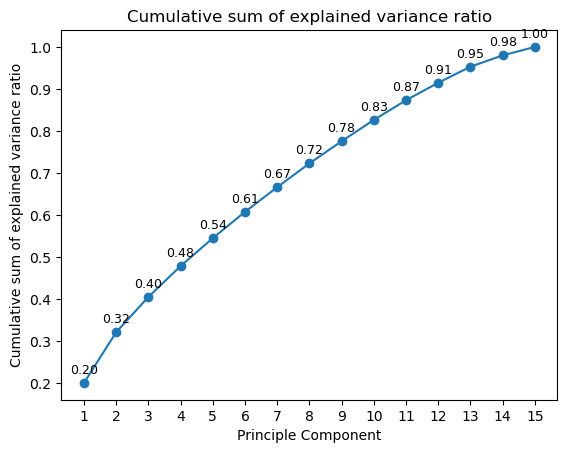

In [10]:
# Visualize the Cum sum of explained variance ratio
x = range(1, 1 + len(explained_variance_ratio_))
y = cumulative_sum
plt.plot(x,y,"-o")
plt.xticks(x)

for a,b in zip(x,y):
    plt.text(a, b + 0.015, "%.2f" % b, ha = "center", va = "bottom", fontsize = 9)

plt.xlabel("Principle Component")
plt.ylabel("Cumulative sum of explained variance ratio")
plt.title("Cumulative sum of explained variance ratio")

plt.show()

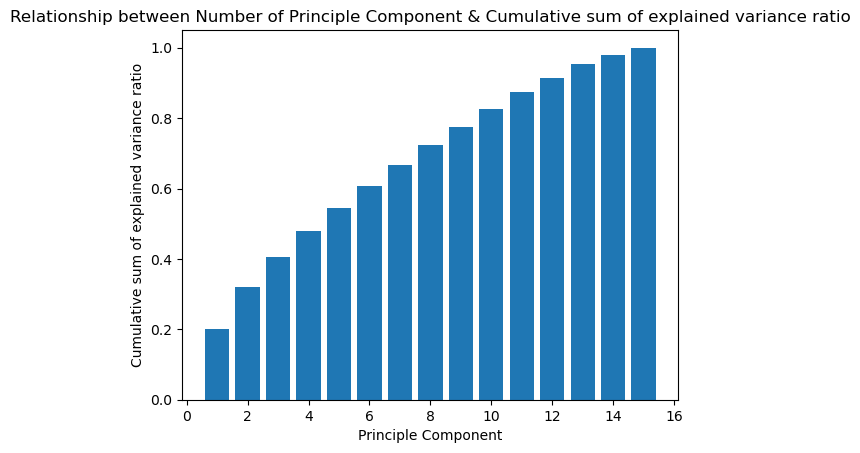

In [11]:
plt.bar(range(1, 1 + len(explained_variance_ratio_)), cumulative_sum)
plt.xlabel("Principle Component")
plt.ylabel("Cumulative sum of explained variance ratio")
plt.title("Relationship between Number of Principle Component & Cumulative sum of explained variance ratio")
plt.show()

It can be seen from the plot above, we can see that when K = 12, It retains 90% of the variance,
in other words, 90% of the event can be explained.
So we will assign 12 to K.

In [12]:
pca = PCA(n_components=12) # Create a PCA instance to reduce data dimensions to 12
sd = np.array(Standardized_Data) # Convert the features into NP array format

In [13]:
# Perform PCA dimensionality reduction
x_dr = pca.fit_transform(sd)
x_dr

array([[-1.81535864, -1.47800268,  0.51901008, ..., -0.402973  ,
         0.24327948, -0.66169614],
       [-1.32052097, -1.69144913, -0.26267314, ...,  0.25128927,
        -0.49523873,  0.71841181],
       [-1.37905251, -0.7668233 ,  0.6754773 , ..., -1.01856667,
        -1.18768084,  0.43453716],
       ...,
       [-2.12475426,  1.98939519,  0.1603513 , ..., -0.80743686,
         1.29879524,  0.59597797],
       [-0.33550032,  0.52205002,  2.46780501, ..., -0.74085467,
         1.5861784 , -0.9927747 ],
       [-0.28169566,  0.33557374,  2.18959079, ...,  0.52128911,
         1.70812258,  0.63238884]])

## Task 2 Supervised learning

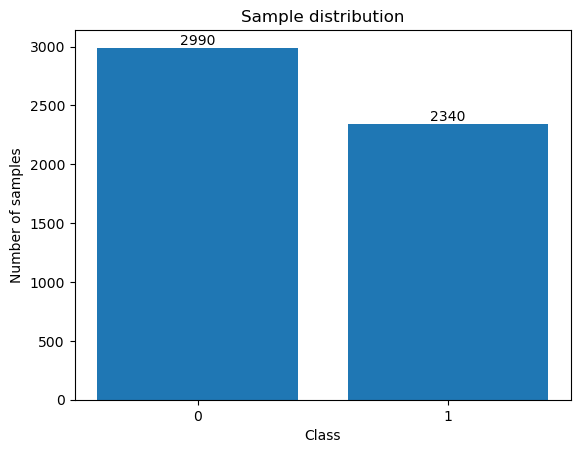

In [15]:
# Check distribution of different labels
Label, Counts = np.unique(Label, return_counts=True)

p1 = plt.bar(Label, Counts,label="counts")
plt.title("Sample distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
a = [0,1]
labels = ["0", "1"]
plt.xticks(a,labels)
plt.bar_label(p1, label_type="edge")
plt.savefig("Sample distribution")

In [16]:
# Split the data
from sklearn.model_selection import train_test_split
Data = x_dr
Label = Filtered_data[["Label"]]
X_train, X_test, Y_train, Y_test = train_test_split(Data, Label, test_size=0.2)

In [17]:
# Define learning curve
from sklearn.model_selection import learning_curve
def draw_learning_curve(clf,classifier):
    train_sizes, train_scores, test_scores = learning_curve(clf, Data, Label, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

    plt.title("Learning curve for %s classifier"%(classifier))
    plt.legend()
    plt.savefig("Learning curve for classifier" + classifier)
    plt.show()

In [19]:
# Define Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def draw_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)

    # Create and display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")

    plt.title(f"Confusion Matrix of {classifier_name} Classifier")
    plt.legend()
    filename = f"Confusion_Matrix_{classifier_name}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

### Classifier1 SVM

In [20]:
from sklearn import svm
classifier1 = svm.SVC()

In [21]:
# Train the SVM model with training data
classifier1.fit(X_train, Y_train)
pred1 = classifier1.predict(X_test)

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Cross-validation scoring
from sklearn.model_selection import cross_val_score

# Use training data to compute the correct cross-validation accuracy score
average_score = cross_val_score(classifier1, X_train, Y_train, cv=5, scoring="accuracy").mean()
print("Cross-validation accuracy for SVM:", average_score)

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

Cross-validation accuracy for SVM: 0.7260794544523884


In [34]:
report = classification_report(Y_test, pred1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.71       611
           1       0.62      0.66      0.64       455

    accuracy                           0.68      1066
   macro avg       0.68      0.68      0.68      1066
weighted avg       0.69      0.68      0.68      1066



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


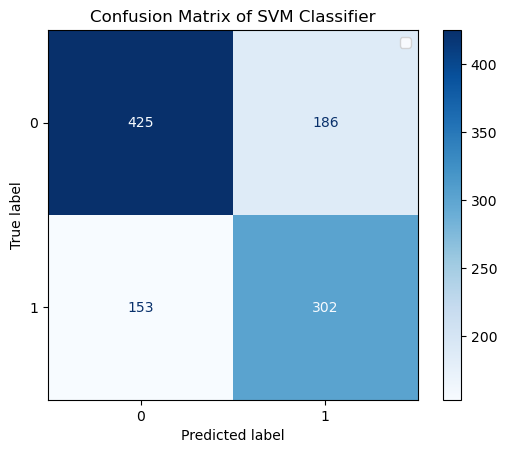

In [35]:
# Confusion Matrix
draw_confusion_matrix(Y_test, pred1, "SVM")

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

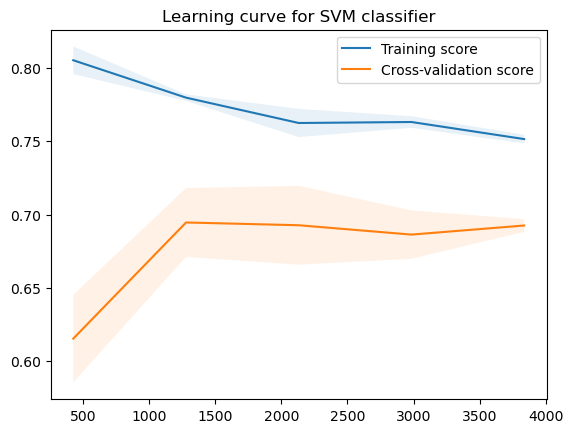

In [36]:
# Learning curve
draw_learning_curve(classifier1,"SVM")

### Classifier 2 Decision Tree

In [37]:
# Import decision tree model
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=0)

In [38]:
# Train decision tree model
classifier2.fit(X_train, Y_train)
pred2 = classifier2.predict(X_test)

In [39]:
# Use training data to compute the correct cross-validation accuracy score for decision tree
average_score = cross_val_score(classifier2, X_train, Y_train, cv=5, scoring='accuracy').mean()
print("Cross-validation accuracy for Decision Tree:", average_score)

Cross-validation accuracy for Decision Tree: 0.6552562345546511


In [40]:
report = classification_report(Y_test, pred2)
print("Classification Report for Decision Tree:\n", report)

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       611
           1       0.59      0.55      0.57       455

    accuracy                           0.64      1066
   macro avg       0.63      0.63      0.63      1066
weighted avg       0.64      0.64      0.64      1066



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


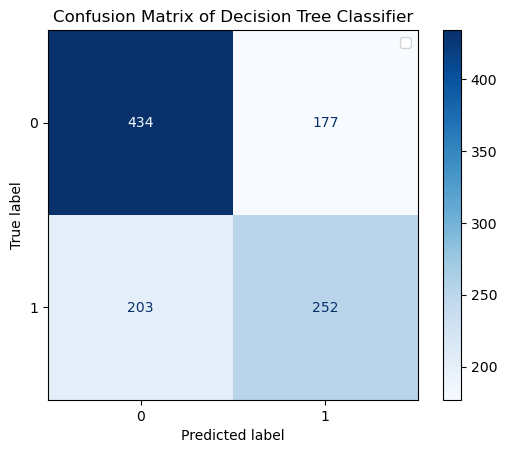

In [43]:
# Confusion Matrix
draw_confusion_matrix(Y_test, pred2, "Decision Tree")

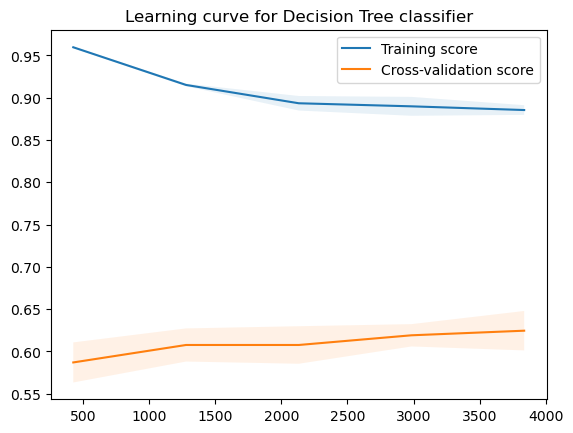

In [44]:
# Learning curve
draw_learning_curve(classifier2,"Decision Tree")

### Classifier 3 Random Forest

In [45]:
# Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [46]:
# Train the model
classifier3.fit(X_train, Y_train)
pred3 = classifier3.predict(X_test)

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [48]:
# Use training data to compute the correct cross-validation accuracy score for Random Forest
average_score = cross_val_score(classifier3, X_train, Y_train, cv=5, scoring='accuracy').mean()
print("Cross-validation accuracy for Random Forest:", average_score)

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

Cross-validation accuracy for Random Forest: 0.6909028614830837


In [49]:
report = classification_report(Y_test, pred3)
print("Classification Report for Random Forest:\n", report)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72       611
           1       0.62      0.67      0.64       455

    accuracy                           0.68      1066
   macro avg       0.68      0.68      0.68      1066
weighted avg       0.69      0.68      0.69      1066



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


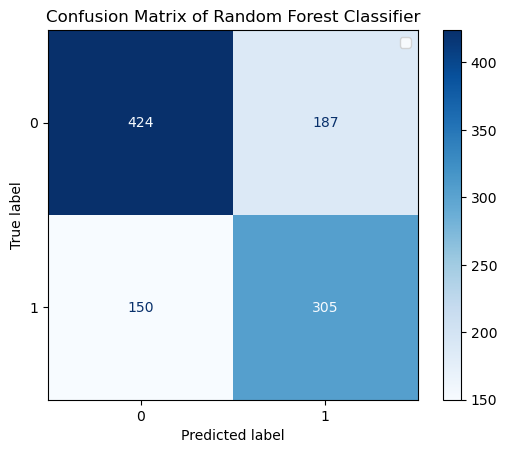

In [50]:
# Confusion Matrix
draw_confusion_matrix(Y_test, pred3, "Random Forest")

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector 

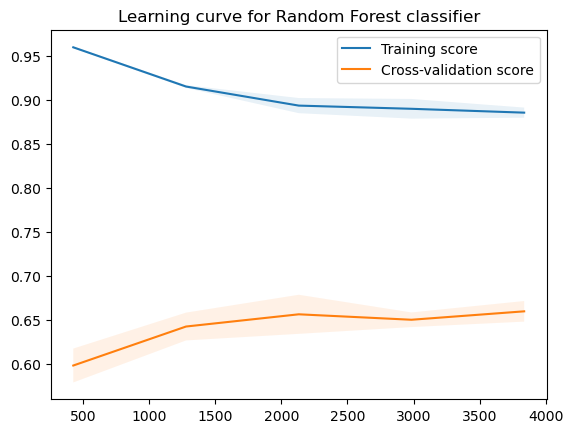

In [51]:
# Learning curve
draw_learning_curve(classifier3,"Random Forest")

### Classifier 4 Naive Bayes

In [52]:
# Import the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()

In [53]:
# Train model
classifier4.fit(X_train, Y_train)
pred4 = classifier4.predict(X_test)

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Use training data to compute the correct cross-validation accuracy score for Naive Bayes
average_score = cross_val_score(classifier4, X_train, Y_train, cv=5, scoring='accuracy').mean()
print("Cross-validation accuracy for Naive Bayes:", average_score)

Cross-validation accuracy for Naive Bayes: 0.7234972948279752


/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

In [55]:
report = classification_report(Y_test, pred4)
print("Classification Report for Naive Bayes:\n", report)

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       611
           1       0.64      0.63      0.64       455

    accuracy                           0.69      1066
   macro avg       0.69      0.68      0.69      1066
weighted avg       0.69      0.69      0.69      1066



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


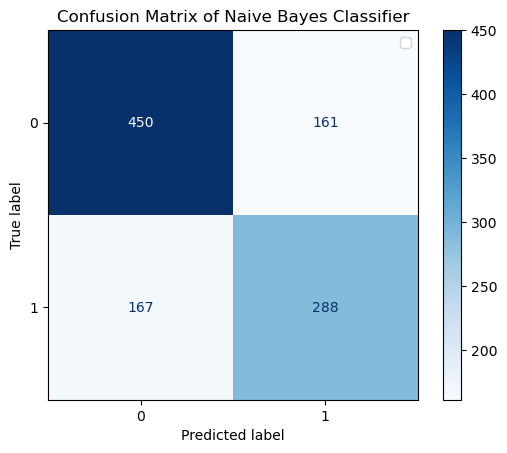

In [56]:
# Confusion Matrix
draw_confusion_matrix(Y_test, pred4, "Naive Bayes")

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-v

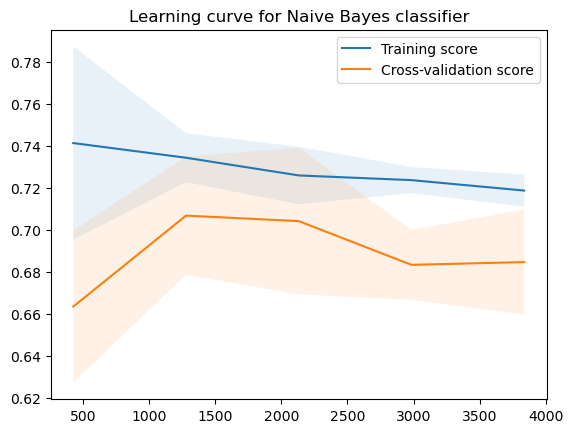

In [57]:
# Learning curve
draw_learning_curve(classifier4,"Naive Bayes")

Based on the results obtained, the Support Vector Machine (SVM) classifier demonstrates superior performance compared to other models.

According to the Confusion Matrix,the SVM model correctly classifies a significant number of both positive and negative instances, with a balanced distribution of misclassification. Indicating a reasonable trade-off between precision and recall.
- The SVM model achieves an accuracy of 68%, which is competitive given the dataset's complexity.
- A precision of 74% for class 0 and 62% for class 1 suggests that the model is reliable in predicting both classes, with a slightly higher tendency toward correctly identifying class 0.
- The recall scores (70% for class 0 and 66% for class 1) indicate that the model performs well in capturing relevant instances, leading to a balanced F1-score of approximately 0.71 and 0.64, respectively.

The learning curve suggests that the model generalizes well, with minimal overfitting. The training and cross-validation scores exhibit a consistent trend, indicating that the SVM model effectively learns from increasing amounts of training data.


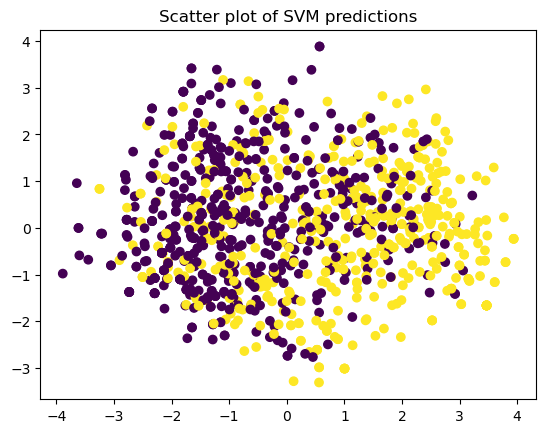

In [58]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred1)
plt.title('Scatter plot of SVM predictions')
plt.show()

## Task 2 Unsupervised learning

In [59]:
# Specify the number of clusters k
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

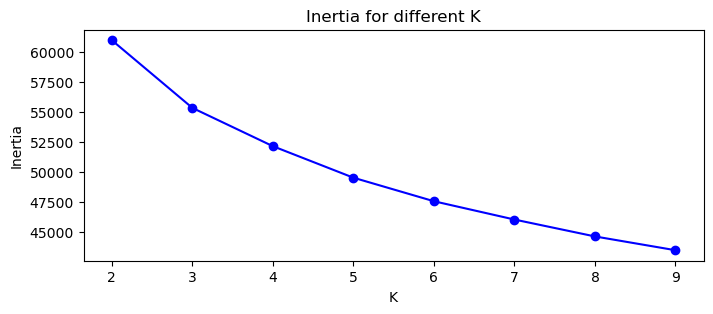

In [60]:
# Inertia
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_dr)
                for k in range(2, 10)]
inertia = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), inertia, "bo-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Inertia for different K")
plt.savefig("Inertia for different K")
plt.show()

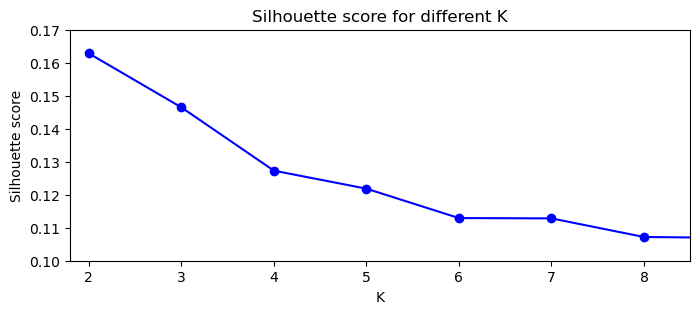

In [61]:
# Silhouette score
silhouette_scores = [silhouette_score(x_dr, model.labels_)
                     for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.1, 0.17])
plt.title("Silhouette score for different K")
plt.savefig("Silhouette score for different K")
plt.show()

The Silhouette Score plot shows a clear peak at k=2, indicating the best cluster separation. The Inertia plot's "elbow" point also occurs at k=2, suggesting diminishing returns for adding more clusters. Therefore, k=2 is the optimal choice for balancing cluster cohesion and separation.

/Users/xuruoyu/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


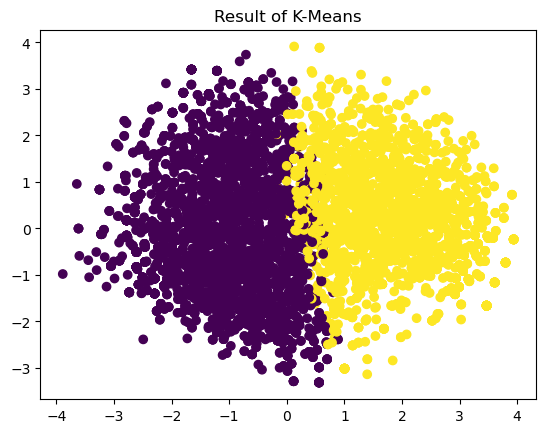

In [62]:
# Unsupervised classification with standardized data
y_uns_pred = KMeans(n_clusters=2, init="random").fit_predict(x_dr)
plt.scatter(x_dr[:,0],x_dr[:,1], c = y_uns_pred)
plt.title("Result of K-Means")
plt.show()